Geometric Algebra is a mathematical framework that unifies many areas of mathematics, such as algebra, geometry, and calculus. It is a powerful tool for reasoning about geometric objects, transformations, and operations in various dimensions.

Geometric Algebra is a Real Clifford Algebra, that is a specific instance of Clifford Algebras, where the underlying scalar field is the set of real numbers. Clifford Algebras, in general, are algebraic structures that extend the concept of complex numbers and quaternions to higher dimensions. They were introduced by the mathematician William Kingdon Clifford in the late 19th century and are used in various branches of mathematics and physics.

A Real Clifford Algebra is defined based on a finite-dimensional real vector space, equipped with a quadratic form, which is a function that assigns a scalar value to a vector based on its inner product with itself. The Real Clifford Algebra is obtained by adding new elements called "bivectors" and "multivectors," which can represent geometric objects like oriented planes and volumes, depending on the dimension of the vector space. The grade of a multivector is the number of vectors in its representation. For example, a bivector is a multivector of grade 2, and a vector is a multivector of grade 1.

Grassmann Algebra is a mathematical framework that focuses on the algebraic description of geometric operations and relationships between geometric entities, such as points, lines, and planes, particularly in the context of vector spaces. It introduces the concept of "exterior products" and "exterior powers" as ways to combine vectors to create higher-dimensional geometric objects, also known as "k-vectors" or "Grassmannians".

The [Julia package Grassman.jl](https://github.com/chakravala/Grassmann.jl) supports calculations using extended tensor algebra, decribed as Leibniz-Grassmann-Clifford-Hestenes geometric algebra.

In [3]:
using Symbolics
using Grassmann
using GLMakie


@basis is a macro provided by [DirectSum.jl](https://github.com/chakravala/DirectSum.jl) which specifies  (a support package for Grassmann.jl) . It is used to define a basis for a vector space. The basis is defined by a tuple of symbols, which are used to represent the basis vectors. The basis vectors are defined by the symbols, and the basis is defined by the tuple of symbols.

DirectSum interpretes the string with S prefix as a constructor to Signature, which accepts the [Metric Signature](https://en.wikipedia.org/wiki/Metric_signature). `S"+-"` has 2 dimensions, with the first squaring to +1 and the second to -1. See https://github.com/chakravala/DirectSum.jl#directsum-yields-tensorbundle-parametric-type-polymorphism- for more details on this - other characters such as $\infty$ are interpreted. The macro results in variables v1, v2 and v12 being defined to represent the basis Submanifolds (i.e. multi-vectors?).

[streamplot](https://docs.makie.org/stable/examples/plotting_functions/streamplot/) is a visualisation of vectorfields from Makie.jl. 
```
streamplot(f::function, xinterval, yinterval; kwargs...) 
where f either accepts `f(::Point)` or `f(x::Number, y::Number)` and returns Point2
```
vectorfield is an alias for function Grassman.pointfield, which returns another function used for the streamplot. It applies "a versor outermorphism" to the points passed in by streamplot.

In [3]:
@basis S"+-" 

(⟨+-⟩, v, v₁, v₂, v₁₂)

In [4]:
mapper = vectorfield(exp((π/8)*v12/2))

#395 (generic function with 1 method)

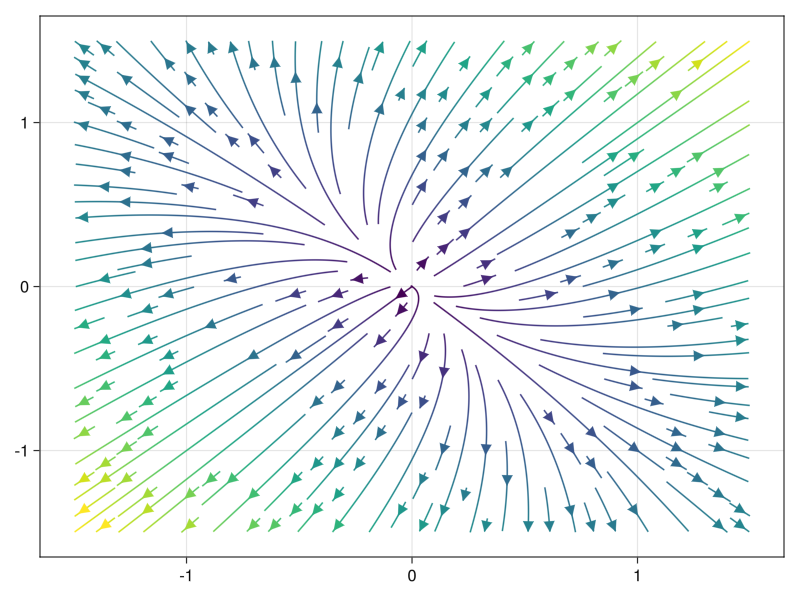

In [5]:
streamplot(mapper,-1.5..1.5,-1.5..1.5)

In [2]:
@basis ℝ^4

(⟨++++⟩, v, v₁, v₂, v₃, v₄, v₁₂, v₁₃, v₁₄, v₂₃, v₂₄, v₃₄, v₁₂₃, v₁₂₄, v₁₃₄, v₂₃₄, v₁₂₃₄)

In [7]:
a = 3v1 + 3v2 - 1v3 + 2v4


3v₁ + 3v₂ - 1v₃ + 2v₄

In [8]:
ones = 1v1 + 1v2 + 1v3 + 1v4

1v₁ + 1v₂ + 1v₃ + 1v₄

In [9]:
a ∧ ones

0v₁₂ + 4v₁₃ + 1v₁₄ + 4v₂₃ + 1v₂₄ - 3v₃₄

In [10]:
a ⋅ ones

7v

In [11]:
@variables a1 a2 a3 a4



4-element Vector{Num}:
 a1
 a2
 a3
 a4

In [12]:
a = a1 * v1 + a2 * v2 + a3 * v3 + a4 * v4

(a1)v₁ + (a2)v₂ + (a3)v₃ + (a4)v₄

In [13]:
a ∧ ones

(a1 - a2)v₁₂ + (a1 - a3)v₁₃ + (a1 - a4)v₁₄ + (a2 - a3)v₂₃ + (a2 - a4)v₂₄ + (a3 - a4)v₃₄

In [14]:
a ⋅ ones

(a1 + a2 + a3 + a4)v

In [15]:
typeof(a)

Chain{⟨++++⟩, 1, Num, 4}

In [19]:
@variables x::AbstractVector

MethodError: MethodError: no method matching (Symbolics.Arr{<:Any, 1})(::SymbolicUtils.BasicSymbolic{AbstractVector})

In [23]:
@variables s1, s2, s3, s4

4-element Vector{Num}:
 s1
 s2
 s3
 s4

In [28]:
bivector = s1 ∧ s2


s1*s2

In [29]:
typeof(bivector)

Num

In [31]:
typeof(v1)

Submanifold{⟨++++⟩, 1, 0x0000000000000001}

In [35]:
supertype(typeof(v1)), supertype(supertype(typeof(v1))), supertype(supertype(supertype(typeof(v1))))

(TensorTerm{⟨++++⟩, 1}, TensorGraded{⟨++++⟩, 1}, Manifold{⟨++++⟩})

In [37]:
ta = supertype(supertype(supertype(supertype(typeof(v1)))))

TensorAlgebra{⟨++++⟩}

In [38]:
supertype(ta)

Number

In [39]:
supertype(Number)

Any

In [40]:
@variables ta::TensorAlgebra

1-element Vector{SymbolicUtils.BasicSymbolic{TensorAlgebra}}:
 ta

In [42]:
ta ⋅ ta

ta*conj(ta)